In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import sklearn as sk
import matplotlib as mpl
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
sns.set()
sns.set_color_codes()

%matplotlib inline
%config InlineBackend.figure_format='png'

# python 2
from __future__ import division

In [2]:
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.DESCR)
print(digits.keys())

Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an input matrix of 8x8 where each element is a

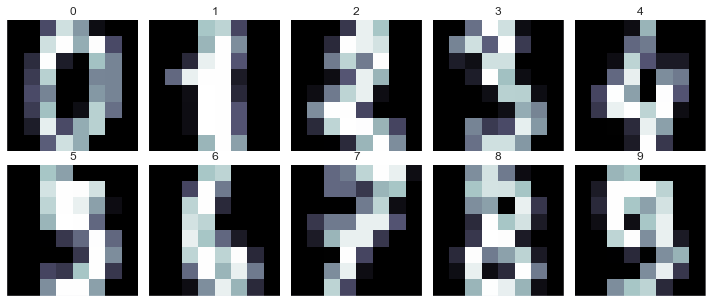

In [60]:
N = 2 ; M = 5;
fig = plt.figure(figsize=(10,5))
plt.subplots_adjust(top=1, bottom = 0 , hspace= 0, wspace = 0.05)
for i in range(N):
    for j in range(M):
        k = i * M + j
        ax = fig.add_subplot(N, M, k+1)
        ax.imshow(digits.images[k], cmap = plt.cm.bone, interpolation="none");
        ax.grid(False)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
        plt.title(digits.target_names[k])
plt.tight_layout()
plt.show()
        

In [61]:
from sklearn.tree import DecisionTreeClassifier

tree1 = DecisionTreeClassifier(criterion='entropy', max_depth=5)


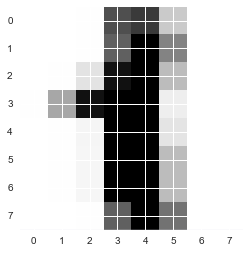

In [62]:
plt.imshow(digits.images[1], interpolation="none");

In [63]:
X = digits.data
y = digits.target

In [68]:

tree1_fit = tree1.fit(X,y)

In [36]:

tree1_fit.predict(X)

array([0, 1, 2, ..., 8, 9, 8])

In [65]:
from sklearn.metrics import classification_report

In [69]:
print(classification_report(y, tree1_fit.predict(X), digits=4))

             precision    recall  f1-score   support

          0     0.9611    0.9719    0.9665       178
          1     0.7174    0.9066    0.8010       182
          2     0.8935    0.8531    0.8728       177
          3     0.9145    0.7596    0.8299       183
          4     0.8526    0.7348    0.7893       181
          5     0.9799    0.8022    0.8822       182
          6     1.0000    0.9282    0.9628       181
          7     0.9205    0.7765    0.8424       179
          8     0.6055    0.8908    0.7209       174
          9     0.8172    0.8444    0.8306       180

avg / total     0.8670    0.8464    0.8501      1797



# 트리 그리기

In [70]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [71]:
import StringIO
import pydot
from sklearn.tree import export_graphviz
from IPython.core.display import Image 

def draw_decision_tree(classifier):
    command_buf = StringIO.StringIO()
    export_graphviz(classifier, out_file=command_buf )
    graph = pydot.graph_from_dot_data(command_buf.getvalue())
    image = graph.create_png()
    image_buf = StringIO.StringIO()
    image_buf.write(image)
    return Image(image_buf.getvalue())

# 데이터 셋 나누기

In [72]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state=1)


In [73]:
tree_fit_2 = tree1.fit(X_train, y_train)

In [74]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, tree_fit_2.predict(X_test), digits=4))
print(confusion_matrix(y_test, tree_fit_2.predict(X_test)))

             precision    recall  f1-score   support

          0     1.0000    0.9036    0.9494        83
          1     0.7475    0.7957    0.7708        93
          2     0.8000    0.7529    0.7758        85
          3     0.7273    0.7347    0.7310        98
          4     0.7025    0.8500    0.7692       100
          5     0.8919    0.8148    0.8516        81
          6     0.9610    0.8409    0.8970        88
          7     0.9041    0.7416    0.8148        89
          8     0.5698    0.6049    0.5868        81
          9     0.7217    0.8218    0.7685       101

avg / total     0.7991    0.7875    0.7904       899

[[75  0  0  1  4  0  0  1  2  0]
 [ 0 74  2  6  0  0  0  0  5  6]
 [ 0  6 64  5  1  0  2  0  4  3]
 [ 0  2  5 72  0  2  0  2  7  8]
 [ 0  5  0  0 85  1  0  2  3  4]
 [ 0  2  0  2  2 66  1  0  4  4]
 [ 0  3  2  0  0  0 74  0  9  0]
 [ 0  1  0  0 12  3  0 66  2  5]
 [ 0  5  6  4 11  2  0  2 49  2]
 [ 0  1  1  9  6  0  0  0  1 83]]


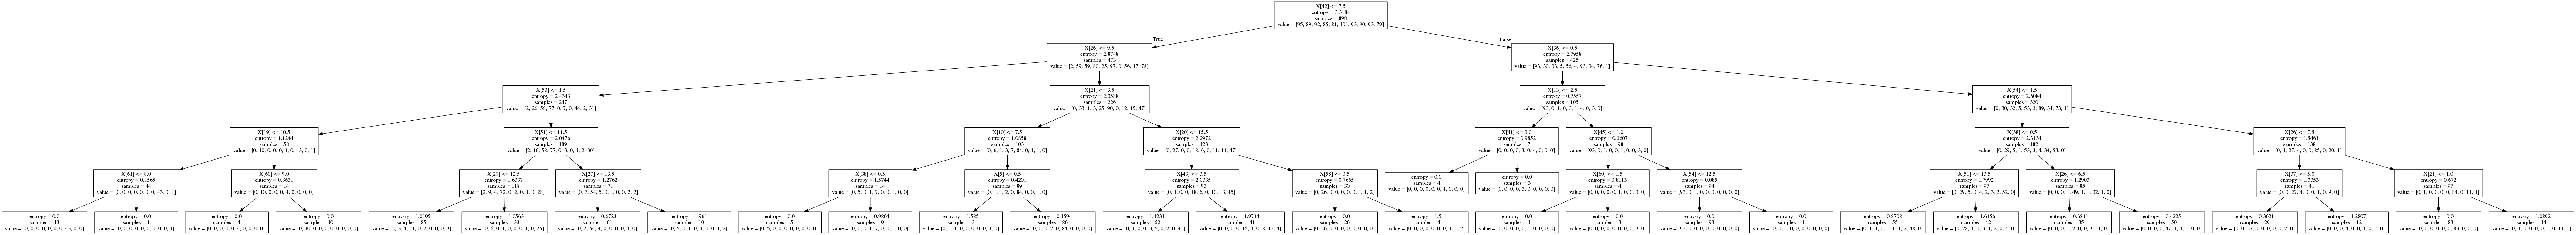

In [75]:
draw_decision_tree(tree_fit_2)

In [76]:
digits.images[0]

array([[  0.,   0.,   5.,  13.,   9.,   1.,   0.,   0.],
       [  0.,   0.,  13.,  15.,  10.,  15.,   5.,   0.],
       [  0.,   3.,  15.,   2.,   0.,  11.,   8.,   0.],
       [  0.,   4.,  12.,   0.,   0.,   8.,   8.,   0.],
       [  0.,   5.,   8.,   0.,   0.,   9.,   8.,   0.],
       [  0.,   4.,  11.,   0.,   1.,  12.,   7.,   0.],
       [  0.,   2.,  14.,   5.,  10.,  12.,   0.,   0.],
       [  0.,   0.,   6.,  13.,  10.,   0.,   0.,   0.]])

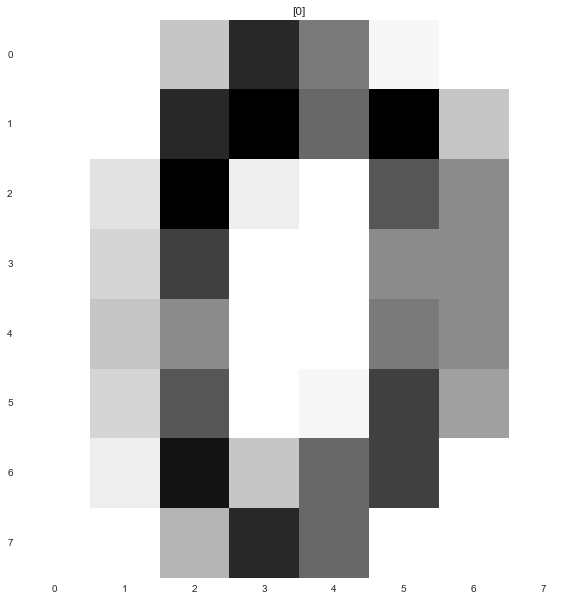

In [78]:
# 박사님 코드
K = 0
plt.figure(figsize=(10,10))
plt.imshow(digits.images[K], interpolation="nearest")
plt.grid(False)
plt.title(tree_fit_2.predict([X[K:K+1]][0]))
plt.show()

# 예측이 틀린것만 보자

In [83]:
idx_miss = y_test != tree_fit_2.predict(X_test)
X_miss = X_test[idx_miss]
y_miss = y_test[idx_miss]


TypeError: Invalid dimensions for image data

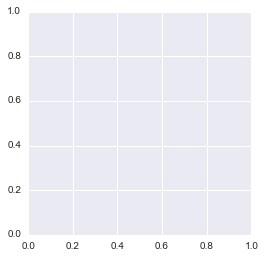

In [86]:
K = 8
plt.imshow(X_miss[K])
plt.title(y_miss[K])

In [6]:
from sklearn.datasets import fetch_lfw_people

lfw_people = fetch_lfw_people(min_faces_per_person=70, resize = 0.4)
print(lfw_people.DESCR)
print(lfw_people.keys())

LFW faces dataset
['images', 'data', 'target_names', 'DESCR', 'target']


In [33]:
lfw_people.images[0].max()

251.33333

In [58]:
print(lfw_people.images[0][-1,:])

[  75.66666412  188.66667175  248.66667175  251.33332825  251.33332825
  251.          242.66667175  211.66667175  160.66667175  136.66667175
  133.33332825  132.          130.66667175  135.66667175  141.33332825
  136.33332825  126.          129.33332825  135.66667175  140.66667175
  143.          143.33332825  139.66667175  140.33332825  141.33332825
  137.66667175  116.66666412   84.           31.           22.
   20.66666603   13.66666698   14.           21.           27.
   28.33333397   28.33333397]


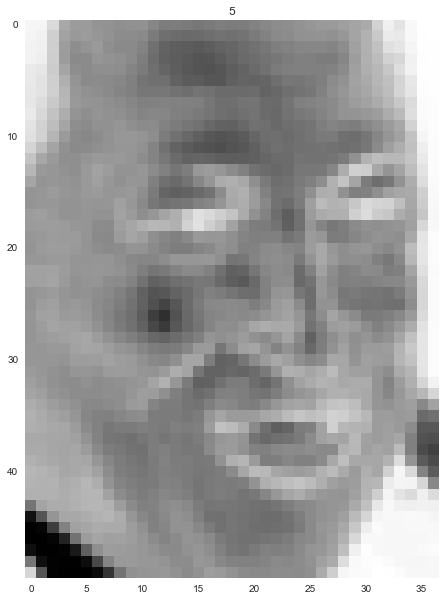

In [55]:
idx = 0

plt.figure(figsize=(10,10))
plt.imshow(lfw_people.images[idx], interpolation="nearest", );#cmap = mpl.cm.bone);
plt.grid(False)
plt.title(lfw_people.target[idx]);

빈도주의와 베이즈 주의 , 빈도주의를 이용하는 알고리즘은 없나?

조건부 확률은 무엇을 알기 위함인가?

두개를 나눠서 생각할 수는 없다.


통 안에 공이 있는데, 하나를 뽑았는데
뭔지 모르겠다. => 하얀색일 확률과 까만색일 확률
모르는데 사실일 확률 -=> 베이지안 
어떻게 아냐? 

실제로 여러번 뽑아본다. 

1000 번 중 606번, 394번 빈도주의 값을 이용한 조건부를 

6/10, 4/10 에 수렴한다?

하나를 뽑았을때 바라본 관점. 
1000개를 뽑아본 확률



%logstart
%logstop

.ipython폴더에 ipython_log.py

조건부 확률은 